# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2\Scripts
Changed working directory to: c:\Users\hp\Desktop\python-projects\GooglePlay-scraping_week-2


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Fetching app info...

Scraping reviews...


  0%|          | 0/3 [00:00<?, ?it/s]

Scraping 450 reviews for app ID: com.combanketh.mobilebanking...


 33%|███▎      | 1/3 [00:07<00:14,  7.25s/it]

Successfully scraped 8119 reviews.
Scraping 450 reviews for app ID: com.boa.boaMobileBanking...


 67%|██████▋   | 2/3 [00:09<00:04,  4.47s/it]

Successfully scraped 1185 reviews.
Scraping 450 reviews for app ID: com.dashen.dashensuperapp...


100%|██████████| 3/3 [00:11<00:00,  3.98s/it]

Successfully scraped 764 reviews.
Sample reviews:
                              review_id  \
0  5112423d-e618-44ba-ba49-62677cb76cd6   
1  bcb34681-1dd4-4781-b400-4393bb10b1d9   
2  c69f051a-00f8-4144-8423-b7ebcd328d2d   

                                         review_text  rating  \
0  This application is very important and advanta...       5   
1                          why didn't work this app?       1   
2      The app makes our life easier. Thank you CBE!       5   

          review_date      user_name  thumbs_up reply_content bank_code  \
0 2025-11-27 23:08:20  A Google user          0          None       CBE   
1 2025-11-27 22:40:35  A Google user          0          None       CBE   
2 2025-11-27 18:00:06  A Google user          0          None       CBE   

                     bank_name app_id             source  
0  Commercial Bank of Ethiopia         Google Play Store  
1  Commercial Bank of Ethiopia         Google Play Store  
2  Commercial Bank of Ethiopia         Goo

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
3,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad 👎,1,2025-11-27 16:28:10,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store
4,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,A Google user,0,None,CBE,Commercial Bank of Ethiopia,,Google Play Store


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
import pandas as pd

# 1. Load raw data
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# 2. Remove rows where 'user_name' is null or empty
before = len(df)

df = df[df['user_name'].notna() & (df['user_name'].astype(str).str.strip() != "")]

after = len(df)

print(f"Removed {before - after} rows with null or empty user_name")
print(f"Remaining rows: {after}")

# 3. Save cleaned data
df.to_csv(raw_path, index=False)
print(f"Cleaned file saved to: {raw_path}")


Loaded 10068 rows
Removed 0 rows with null or empty user_name
Remaining rows: 10068
Cleaned file saved to: data/raw/raw_reviews.csv


In [4]:
df.sample(5)

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
9930,a34ea67e-01a2-487d-b414-b2d41d0572a2,I have used many mobile banking and also telle...,5,2025-03-12 09:52:45,yibe teklu,24,NaN,DASHENBANK,Dashen Bank,NaN,Google Play Store
3015,a430cccc-982c-4ea8-926a-2c6a085200a7,700000 a,5,2024-06-26 23:33:22,A Google user,1,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
3116,3d495514-cd0d-40f5-b3e7-bbfe295b0059,This application is very useful and incredible...,5,2024-05-31 20:50:07,A Google user,3,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
8106,ff77591e-52cc-4783-89ea-5018a376d6e8,As wr wb,5,2014-02-26 00:46:53,A Google user,2,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store
5446,fe581ce0-d9b6-4838-9c32-8d98de12f16e,"The app is good. However, whenever you changed...",3,2023-03-10 21:54:58,A Google user,97,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play Store


## Describing data but per bank

In [6]:
import pandas as pd

df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Generate describe() per bank
bank_descriptions = df.groupby("bank_code").describe()

print(bank_descriptions)


            rating                                             
             count      mean       std  min  25%  50%  75%  max
bank_code                                                      
BOA          720.0  2.577778  1.801577  1.0  1.0  1.0  5.0  5.0
CBE         4542.0  3.770586  1.606455  1.0  2.0  5.0  5.0  5.0
DASHENBANK   490.0  4.075510  1.541655  1.0  3.0  5.0  5.0  5.0


In [7]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 10068 reviews

[1/6] Checking for missing data...

Missing values:
  review_text: 7 (0.07%)
  reply_content: 9997 (99.29%)
  app_id: 10068 (100.00%)

review_text    7
dtype: int64

[2/6] Handling missing values...
Removed 7 rows with missing critical values

[3/6] Normalizing dates...
Date range: 2014-02-17 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 10061 reviews

Saving processed data...
Data saved to: data/processed/processed_reviews.csv

PREPROCESSING REPORT

Original records: 10068
Records with missing critical data: 7
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 10061

Data retention rate: 99.93%
Data error rate: 0.07%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 8112
  Bank of Abyssinia: 1185
  Dashen Bank: 764

Rating distribution:
  ⭐⭐⭐⭐⭐: 6347 (63.1%)
  ⭐⭐⭐⭐: 

## 3. Visualizations

Let's explore the cleaned data.

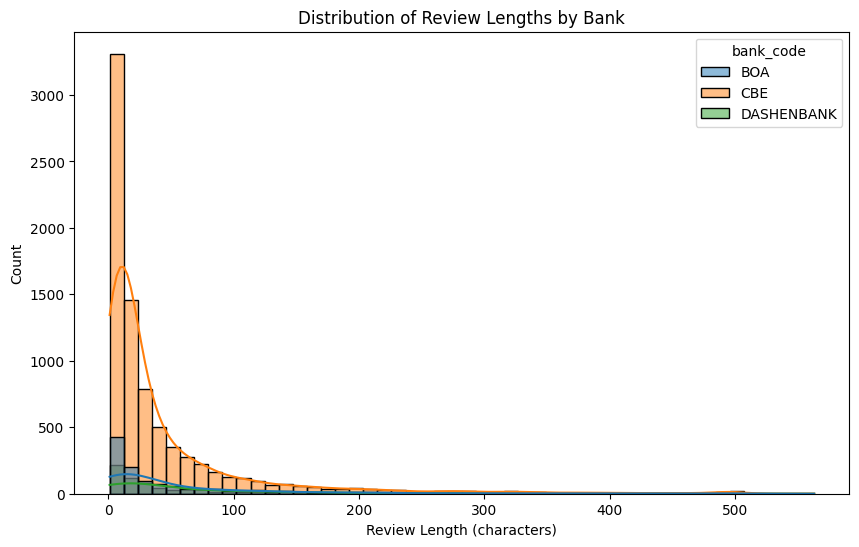

In [8]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

## More preprocessing 
Remove duplicates, handle missing data.
Normalize dates (e.g., to YYYY-MM-DD).
Save as CSV with columns: review, rating, date, bank, source.

In [9]:
import pandas as pd

# ============================
# 1. Load raw data
# ============================
raw_path = "data/raw/raw_reviews.csv"
df = pd.read_csv(raw_path)

print(f"Loaded {len(df)} rows")

# ============================
# 2. Remove duplicates
# ============================
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows")

# ============================
# 3. Handle missing data
#    - Remove rows where review or rating is missing
# ============================
before = len(df)

required_cols = ["review_text", "rating", "review_date", "bank_name", "source"]

df = df.dropna(subset=required_cols)

after = len(df)
print(f"Removed {before - after} rows with missing critical fields")

# ============================
# 4. Normalize date format
#    Convert any date format → YYYY-MM-DD
# ============================
df["date"] = pd.to_datetime(df["review_date"], errors="coerce").dt.date

# Remove rows where date could not be parsed
df = df.dropna(subset=["date"])

# Convert date objects to string
df["date"] = df["date"].astype(str)

# ============================
# 5. Keep only required columns
# ============================
df = df[["review_text", "rating", "review_date", "bank_name", "bank_code", "source"]]

# ============================
# 6. Save cleaned data
# ============================
clean_path = "data/processed/cleaned_reviews.csv"
df.to_csv(clean_path, index=False)

print(f"Cleaned data saved to: {clean_path}")
print(f"Final row count: {len(df)}")


Loaded 10068 rows
Removed 0 duplicate rows
Removed 7 rows with missing critical fields
Cleaned data saved to: data/processed/cleaned_reviews.csv
Final row count: 10061


## Categorizing banks by bank_code 

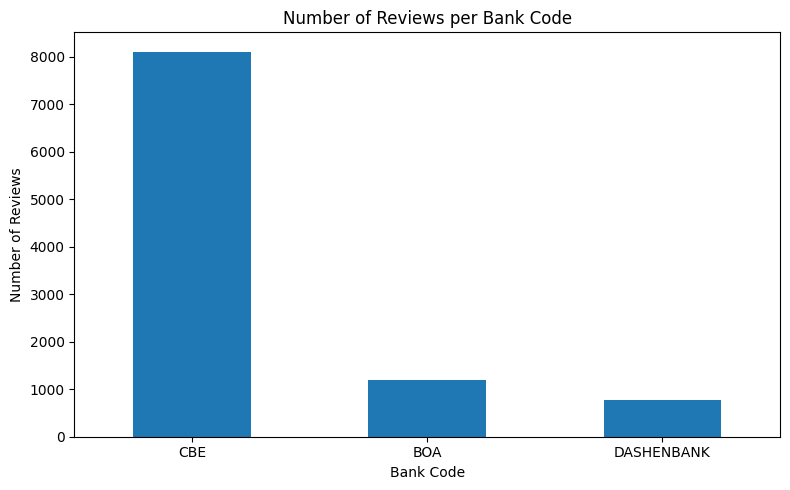

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Deleting duplicate rows

In [12]:
import pandas as pd

# Load your data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count duplicates BEFORE removal
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_count}")

# Drop duplicates
df = df.drop_duplicates()

print(f"Duplicate rows removed: {duplicate_count}")
print(f"Remaining rows: {len(df)}")

# Save cleaned file
df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned dataframe saved to data/processed/cleaned_reviews.csv")


Number of duplicate rows found: 0
Duplicate rows removed: 0
Remaining rows: 10061

Cleaned dataframe saved to data/processed/cleaned_reviews.csv


## using langdetect to remove all Amharic texts

In [13]:
from langdetect import detect, LangDetectException
import pandas as pd

# Load data
df = pd.read_csv("data/processed/cleaned_reviews.csv")

def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False   # treat failed detection as non-English

# Count rows *before* filtering (by bank)
before_counts = df.groupby("bank_code").size()

# Apply English filter
filtered_df = df[df["review_text"].apply(is_english)]

# Count rows *after* filtering
after_counts = filtered_df.groupby("bank_code").size()

# Compute deleted rows per bank_code
deleted_counts = before_counts - after_counts

# Print results
print("=== Non-English Reviews Removed Per Bank ===\n")

for bank in before_counts.index:
    print(f"{bank}: Deleted {deleted_counts.get(bank, 0)} reviews "
          f"(Before: {before_counts[bank]}, After: {after_counts.get(bank, 0)})")

# Save the filtered dataframe
filtered_df.to_csv("data/processed/cleaned_reviews.csv", index=False)

print("\nCleaned file saved to data/processed/cleaned_reviews.csv")


=== Non-English Reviews Removed Per Bank ===

BOA: Deleted 453 reviews (Before: 1185, After: 732)
CBE: Deleted 3508 reviews (Before: 8112, After: 4604)
DASHENBANK: Deleted 271 reviews (Before: 764, After: 493)

Cleaned file saved to data/processed/cleaned_reviews.csv


## Checking the data after the use of langdetect to remove Amharic reviews

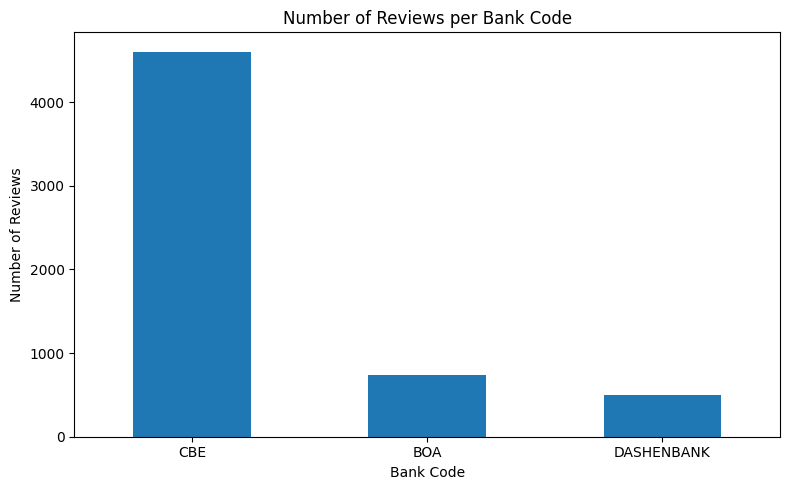

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# If your cleaned file is already saved:
df = pd.read_csv("data/processed/cleaned_reviews.csv")

# Count reviews per bank_code
bank_counts = df["bank_code"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
bank_counts.plot(kind="bar")

plt.xlabel("Bank Code")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Bank Code")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
